In [1]:
import load_cdf as cdf
import numpy as np
import math
from calendar import monthrange
from collections import namedtuple

In [53]:
# IMPORTS FOR PLOTTING
import cdflib 
import matplotlib.dates as md
from matplotlib import pyplot as plt
import datetime as dt

time = cdflib.cdfepoch.unixtime(data['Epoch'])
time =[dt.datetime.fromtimestamp(ts) for ts in time]
time = md.date2num(time)

In [ ]:
Date = namedtuple("Date", ["year", "month", "day"])
def all_dates_in_year(year):
    for month in range(1, 13): # Month is always 1..12
        for day in range(1, monthrange(year, month)[1] + 1):
            yield Date(year, month, day)

In [ ]:
def check_date(year, month, day):
    data = cdf.load_rpw('stat', year, month, day, 'L1')
    if data != -1:
        print(year, month, day)
        return data
        SBM_degraded(data)

In [ ]:
def SBM_degraded(data):
    Fp = 1024 * 2 ** (data['WA_MED_FREQ'] / 32)
    EPEAK_THRES_F = 750
    FP_MIN = 5000   #Hz
    FP_MAX = 60000  #Hz
    RUA = 0.5       #AU gotta check this
    NW_THRES_F = 20
    WA_AMP_MED = data['WA_AMP_MED']
    
    data
    stop

In [ ]:
#for date in all_dates_in_year(2020):
#    check_date(date[0], date[1], date[2])

In [ ]:
1024*(2**(182/32))

In [10]:
data = cdf.load_rpw('stat', 2021,5,22,'L1')

In [11]:
data

{'Epoch': array([674913732079988352, 674913748080014848, 674913764080041472, ...,
        675000088223092608, 675000104223118976, 675000120223145600],
       dtype=int64),
 'ACQUISITION_TIME': array([[674956795,     63488],
        [674956811,     63488],
        [674956827,     63488],
        ...,
        [675043151,     63488],
        [675043167,     63488],
        [675043183,     63488]], dtype=uint32),
 'QUALITY_FLAG': array([3, 3, 3, ..., 3, 3, 3], dtype=uint8),
 'QUALITY_BITMASK': array([255, 255, 255, ..., 255, 255, 255], dtype=uint16),
 'SURVEY_MODE': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'BIA_STATUS_INFO': array([[1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        ...,
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0]], dtype=uint8),
 'SAMPLING_RATE': array([2, 2, 2, ..., 2, 2, 2], dtype=uint8),
 'RPW_STATUS_INFO': array([[1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 

In [12]:
Fp = 1024 * 2 ** (data['WA_MED_FREQ'] / 32)
EPEAK_THRES_F = 750
FP_MIN = 5000   #Hz
FP_MAX = 60000  #Hz
RUA = 0.5       #AU gotta check this
NW_THRES_F = 20
WA_AMP_MED = data['WA_AMP_MED']
WA_NR_EVENTS = data['WA_NR_EVENTS']

In [13]:
Fp.size

5366

<function matplotlib.pyplot.show(close=None, block=None)>

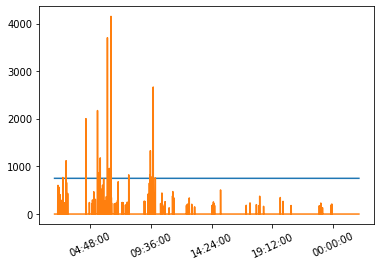

In [59]:
# AMPLITUDE CHECK
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.plot(time, np.zeros(WA_AMP_MED.size)+EPEAK_THRES_F)
plt.plot(time, WA_AMP_MED)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

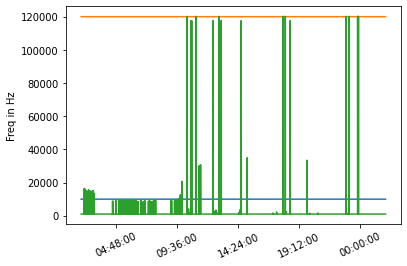

In [62]:
# FREQUENCY CHECK
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.plot(time, np.zeros(Fp.size)+(FP_MIN / RUA))
plt.plot(time, np.zeros(Fp.size)+(FP_MAX / RUA))
plt.plot(time, Fp)
plt.ylabel('Freq in Hz')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

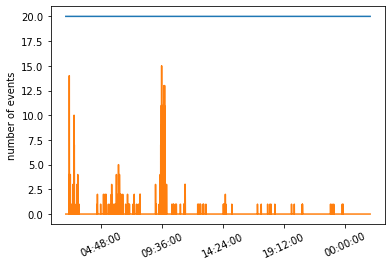

In [64]:
# NR_EVENTS CHECK
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.plot(time, np.zeros(WA_NR_EVENTS.size)+(NW_THRES_F))
plt.plot(time, WA_NR_EVENTS)
plt.ylabel('number of events')
plt.show

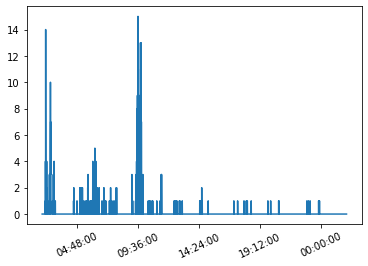

In [54]:
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(time, WA_NR_EVENTS)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

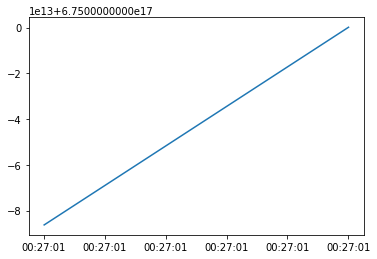

In [51]:
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(time,data['Epoch'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

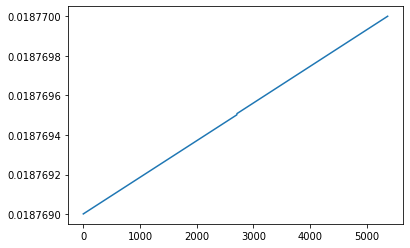

In [52]:
plt.plot(time)
plt.show